In [38]:
%matplotlib inline

In [7]:
import yaml
import msgpack

In [15]:
from conditional_entropy import conditional_entropy, count_transition

In [ ]:
from tempfile import NamedTemporaryFile
from subprocess import check_call

def Lorenz(cfg):
    with NamedTemporaryFile() as f:
        f.write(yaml.dump(cfg))
        f.flush()
        check_call(["./sample/Lorenz", f.name])
    with open("Lorenz.msg", "rb") as f:
        return msgpack.unpack(f)

In [43]:
cfg = {
    "dt": 0.001,
    "T" : 10000000,
    "interval" : 1000
}

In [44]:
res = []
for n in range(10):
    r = 2 ** (4 - n)
    cfg["r"] = r
    indices = Lorenz(cfg)
    p, cp = count_transition(indices)
    res.append({
            "r": r,
            "CE": conditional_entropy(p, cp),
            "N": len(p),
            "M": len(cp) / len(p),
    })
    print("r = {}".format(r))

r = 16
r = 8
r = 4
r = 2
r = 1
r = 0.5
r = 0.25
r = 0.125
r = 0.0625
r = 0.03125


In [47]:
df = pd.DataFrame(res)

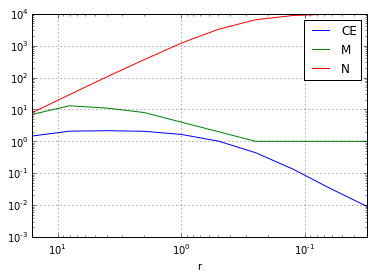

In [46]:
df.set_index("r").plot()
plt.yscale("log")
plt.xscale("log")

In [71]:
res = []
cfg = {
    "dt": 0.001,
    "r" : 0.1,
    "interval" : 1000
}
for n in range(10):
    T = 2 ** (n + 20)
    cfg["T"] = T
    indices = Lorenz(cfg)
    p, cp = count_transition(indices)
    c = cfg.copy()
    c.update({
            "CE": conditional_entropy(p, cp),
            "N": len(p),
            "M": len(cp) / (1.0 * len(p)),
        })
    res.append(c)
    print(c)

{'r': 0.1, 'T': 1048576, 'dt': 0.001, 'interval': 1000, 'M': 1.0057581573896353, 'CE': 0.0079367997774039516, 'N': 1042}
{'r': 0.1, 'T': 2097152, 'dt': 0.001, 'interval': 1000, 'M': 1.017509727626459, 'CE': 0.023799044826092557, 'N': 2056}
{'r': 0.1, 'T': 4194304, 'dt': 0.001, 'interval': 1000, 'M': 1.0261470152935372, 'CE': 0.035786049389913095, 'N': 4054}
{'r': 0.1, 'T': 8388608, 'dt': 0.001, 'interval': 1000, 'M': 1.053878486816966, 'CE': 0.071550228242131725, 'N': 7851}
{'r': 0.1, 'T': 16777216, 'dt': 0.001, 'interval': 1000, 'M': 1.111617467011291, 'CE': 0.14215021242536488, 'N': 14702}
{'r': 0.1, 'T': 33554432, 'dt': 0.001, 'interval': 1000, 'M': 1.2266249565519638, 'CE': 0.26688739709306131, 'N': 25893}
{'r': 0.1, 'T': 67108864, 'dt': 0.001, 'interval': 1000, 'M': 1.4329778237173463, 'CE': 0.45186657068607672, 'N': 42568}
{'r': 0.1, 'T': 134217728, 'dt': 0.001, 'interval': 1000, 'M': 1.7993314171457135, 'CE': 0.7020264803304751, 'N': 64016}
{'r': 0.1, 'T': 268435456, 'dt': 0.001

In [64]:
df = pd.DataFrame(res).set_index("T")